# Методы оптимизации
## Лабораторная работа №1<br><br> <i>Методы одномерного поиска</i>

### Лабораторную работу выполнил студент гр. ИДБ-18-09 Клемин И. Р.

### Цель работы
Изучение методов безусловной одномерной оптимизации, применение их на практическом примере. <br>Сравнить различные алгоритмы по эффективности на тестовых примерах.

### Порядок выполнения работы:
1. Найти аналитическое решение задачи $\min_{x \in [a, b]} f(x)$.
2. Исследовать их сходимость и провести сравнение по числу вычислений функции для достижения заданной точности.

### Вариант №17
Дана функция: $f(x)=-x^3 + 3(1 + x)(ln(1 + x) - 1)$<br>
Начальный интервал неопределенности $L = [-0.5; 0.5]$<br>
Точность $\varepsilon = 0.05$

In [1]:
from math import log, sqrt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def func(x: float) -> float:
    return -x ** 3 + 3 * (1 + x) * (log(1 + x) - 1)

In [3]:
def draw_plot() -> None:
    x = np.linspace(-0.5, 0.5, 50)
    y = np.array([func(x_i) for x_i in x])
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.spines["left"].set_position("center")
    plt.grid()
    plt.plot(x, y, 'r')

### График данной функции на интервале $[-0.5; 0.5]$

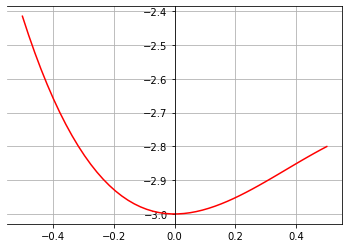

In [4]:
draw_plot()

### Аналитическое решение задачи поиска локального минимума

<b>Необходимое условие экстремума функции:</b><br>
$f'(x)=0$<br>
В нашем случае $f'(x)=-3x^2+3ln(x+1)-3+\frac{3x+3}{x+1}=0$<br>
Отсюда находим, что $x^{*}$ из интервала $[-0.5; 0.5]$ равняется $0$<br>
<b>Достаточное условие экстремума функции:</b><br>
Если $f(x)$ дважды дифференцируема на данном интервале, тогда:<br>
1. Если $f''(x^*)>0$, то $x^*$ - точка локального (глобального) минимума.
2. Если $f''(x^*)<0$, то $x^*$ - точка локального (глобального) максимума.<br>
В нашем случае $f''(x)=-6x+\frac{6}{x + 1}-\frac{3x + 3}{(x + 1)^2}$<br>
$f''(0) = 3 > 0$, следовательно, точка $x^* = 0$ является точкой локального минимума.

### Программная реализация решения

In [5]:
interval = (-0.5, 0.5)
precision = 0.05

#### Метод дихотомии

In [6]:
def dichotomy(func: callable, interval: tuple, precision: float) -> tuple:
    a, b = interval
    offset = precision / 2
    k = 0
    
    while True:
        offset /= 2
        if abs(b - a) <= precision:
            return ((a, b), (a + b) / 2, k)
        l = (a + b) / 2 - offset / 2
        func_l = func(l)
        m = (a + b) / 2 + offset / 2
        func_m = func(m)
        k += 2
        
        if func_l <= func_m:
            b = m
        else:
            a = l

In [7]:
final_interval, solution, k = dichotomy(func, interval, precision)

In [8]:
print(f"Конечный интервал: {[round(border, 5) for border in final_interval]}", f"Приближенное решение: {round(solution, 5)}", f"Количество вычислений функции: {k}", sep='\n')

Конечный интервал: [-0.00625, 0.02695]
Приближенное решение: 0.01035
Количество вычислений функции: 10


In [9]:
dichotomy_convergence = 1 / 2 ** (k / 2)

In [10]:
print(f"Сходимость метода дихотомии при вычислении функции {k} раз: {dichotomy_convergence}")

Сходимость метода дихотомии при вычислении функции 10 раз: 0.03125


#### Метод золотого сечения

In [11]:
def golden_ratio(func: callable, interval: tuple, precision: float) -> tuple:
    a, b = interval
    y = a + (3 - sqrt(5)) * (b - a) / 2
    z = a + b - y
    func_y = func(y)
    func_z = func(z)
    k = 1
    flag = False # True - не пересчитывать func_z, False - не пересчитывать func_y
    
    while True:
        if flag:
            func_z = func_y
            func_y = func(y)
        elif k != 1:
            func_y = func_z
            func_z = func(z)
        k += 1
        
        if func_y <= func_z:
            flag = True
            b = z
            z = y
            y = a + b - y
        else:
            flag = False
            a = y
            y = z
            z = a + b - z
        if abs(a - b) <= precision:
            return ((a, b), (a + b) / 2, k)

In [12]:
final_interval, solution, k = golden_ratio(func, interval, precision)

In [13]:
print(f"Конечный интервал: {[round(border, 5) for border in final_interval]}", f"Приближенное решение: {round(solution, 5)}", f"Количество вычислений функции: {k}", sep='\n')

Конечный интервал: [-0.00658, 0.02786]
Приближенное решение: 0.01064
Количество вычислений функции: 8


In [14]:
golden_ratio_convergence = 0.618 ** (k - 1)

In [15]:
print(f"Сходимость метода золотого сечения при вычислении функции {k} раз: {round(golden_ratio_convergence, 5)}")

Сходимость метода золотого сечения при вычислении функции 8 раз: 0.03443


#### Метод Фибоначчи

In [16]:
def fibonacci(func: callable, interval: tuple, precision: float, const=0.025) -> tuple:
    a = [interval[0]]
    b = [interval[1]]
    k = 1
    fib_nums = [1, 1]
    
    while fib_nums[-1] <= abs(b[-1] - a[-1]) / precision:
        fib_nums.append(fib_nums[-1] + fib_nums[-2])
        
    n = len(fib_nums) - 1
    # l - лямбда, m - мю
    l = [a[-1] + fib_nums[n - k - 1] * (b[-1] - a[-1]) / fib_nums[n - k + 1]]
#     l = a + fib_nums[n - k - 1] * (b - a) / fib_nums[n - k + 1]
    m = a[-1] + fib_nums[n - k] * (b[-1] - a[-1]) / fib_nums[n - k + 1]
    func_l = func(l[-1])
    func_m = func(m)
    k_ = 2
    
    while k != n - 2:
        if func_l > func_m:   
            a.append(l[k - 1])
            l.append(m)
            m = a[-1] + fib_nums[n - k - 1] * (b[-1] - a[-1]) / fib_nums[n - k]
            func_m = func(m)
        else:
            b.append(m)
            m = l[-1]
            l.append(a[-1] + fib_nums[n - k - 2] * (b[-1] - a[-1]) / fib_nums[n - k])
            func_l = func(l[-1])
            
        k += 1
        k_ += 1
        
    m = l[-2] + const
    func_l = func(l[-2])
    func_m = func(m)
    k_ += 2
    
    if func_l > func_m:
        a[-1] = l[-2]
        b[-1] = b[-2]
    else:
        a[-1] = a[-2]
        b[-1] = l[-2]
    
    return ((a[-1], b[-1]), (a[-1] + b[-1]) / 2, k_)

In [17]:
final_interval, solution, k = fibonacci(func, interval, precision)

In [18]:
print(f"Конечный интервал: {[round(border, 5) for border in final_interval]}", f"Приближенное решение: {round(solution, 5)}", f"Количество вычислений функции: {k}", sep='\n')

Конечный интервал: [-0.02381, 0.11905]
Приближенное решение: 0.04762
Количество вычислений функции: 8


In [19]:
fib_nums = [1, 1]
for i in range(k - 2):
    fib_nums.append(fib_nums[-1] + fib_nums[-2])
fib_k = fib_nums[-1]

In [20]:
fibonacci_convergence = 1 / fib_k

In [21]:
print(f"Сходимость метода Фибоначчи при вычислении функции {k} раз: {round(fibonacci_convergence, 5)}")

Сходимость метода Фибоначчи при вычислении функции 8 раз: 0.04762


## Выводы:
1. Для функции, данной в задании, количество вычислений функции было больше всего в методе дихотомии (10), а в двух других по 8.
2. Для функции, данной в задании, сходимость для метода дихотомии оказалась самой маленькой, что говорит о том, что в рамках данного примера он сходится быстрее двух других.
3. Медленнее всех в рамках данного примера сходится метод Фибоначчи.